## 1. Exploratory Data Analysis for DermaMNIST
This notebook performs a full exploratory data analysis (EDA) on the **DermaMNIST** dataset from MedMNIST.

We will inspect dataset structure, visualize images, analyze pixel statistics, and understand class balance.

### Description:
**DermaMNIST** is derived from the **HAM10000 ("Human Against Machine with 10000 training images")** dataset — one of the most popular open dermatology datasets.  
It contains dermatoscopic images of various **skin lesions** with corresponding diagnostic categories.  
The goal is to classify **skin lesion types** that may be benign (non-cancerous) or malignant (cancerous). 

In [10]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from medmnist import DermaMNIST

sns.set_theme(style="whitegrid", palette="pastel")
plt.rcParams["figure.figsize"] = (6, 4)

## 2. Load Dataset

In [11]:
train_data = DermaMNIST(split='train', download=True)
val_data   = DermaMNIST(split='val', download=True)
test_data  = DermaMNIST(split='test', download=True)

x_train = train_data.imgs
y_train = train_data.labels.flatten()

x_val = val_data.imgs
y_val = val_data.labels.flatten()

x_test = test_data.imgs
y_test = test_data.labels.flatten()

# Combine all labels to check number of unique classes
all_labels = np.concatenate([y_train, y_val, y_test])
num_classes = len(np.unique(all_labels))

print(f"Number of train images: {len(x_train)}")
print(f"Number of val images: {len(x_val)}")
print(f"Number of test images: {len(x_test)}")
print(f"Number of classes: {num_classes}")
print(f"Image size: {x_train[0].shape}")

Number of train images: 7007
Number of val images: 1003
Number of test images: 2005
Number of classes: 7
Image size: (28, 28, 3)


## 3. Convert numeric labels to text

| Label | Abbreviation | Full Name | Description |
|:------:|:--------------|:-----------|:-------------|
| 0 | AKIEC | Actinic Keratoses and Intraepithelial Carcinoma | Precancerous or early-stage skin cancer lesion |
| 1 | BCC | Basal Cell Carcinoma | A common type of skin cancer originating from basal cells |
| 2 | BKL | Benign Keratosis-like Lesions | Non-cancerous growths such as seborrheic keratosis or solar lentigo |
| 3 | DF | Dermatofibroma | Benign fibrous skin nodule |
| 4 | MEL | Melanoma | A highly malignant tumor of melanocytes; can spread rapidly |
| 5 | NV | Melanocytic Nevi | Common mole or birthmark; typically benign |
| 6 | VASC | Vascular Lesions | Includes angiomas, hemangiomas, and other blood vessel growths |


In [12]:
label_map = {
    0: "AKIEC",
    1: "BCC",
    2: "BKL",
    3: "DF",
    4: "MEL",
    5: "NV",
    6: "VASC"
}
y_train_str = np.array([label_map[y] for y in y_train])
y_val_str   = np.array([label_map[y] for y in y_val])
y_test_str  = np.array([label_map[y] for y in y_test])

## 4. Visualize sample images

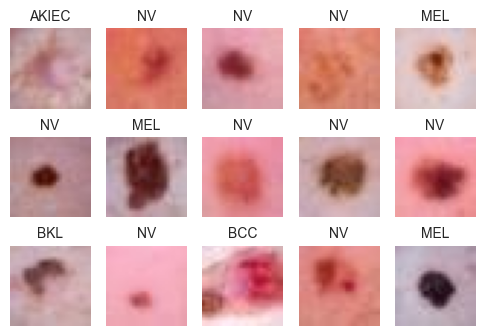

In [13]:
fig, axes = plt.subplots(3, 5, figsize=(6, 4))
for i, ax in enumerate(axes.flat):
    ax.imshow(x_train[i].squeeze(), cmap="gray")
    ax.set_title(f"{y_train_str[i]}", size=10)
    ax.axis("off")
plt.show()

## 5. Class distribution

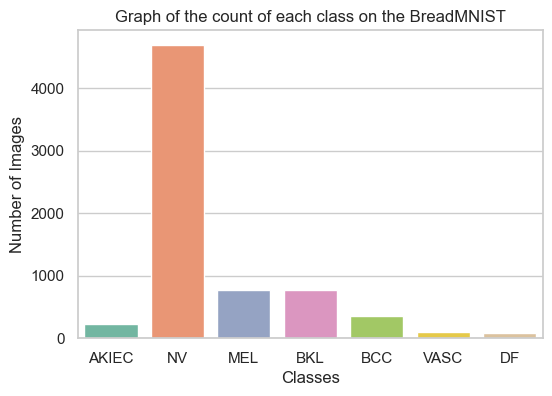

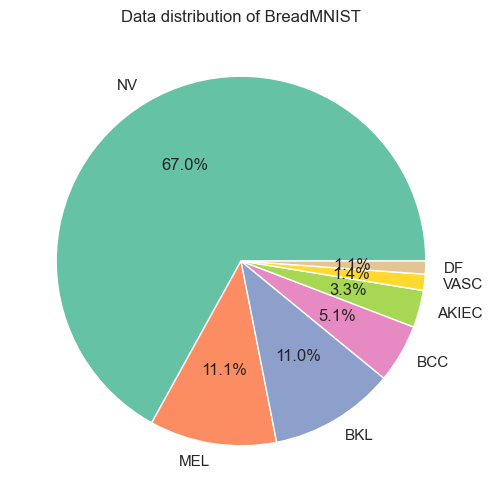

In [ ]:
train_df = pd.DataFrame({"label": y_train_str})

sns.countplot(x="label", data=train_df, palette="Set2", hue="label", legend=False)
plt.title("Graph of the count of each class on the DermaMNIST")
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.show()

plt.figure(figsize=(6, 6))
class_counts = train_df["label"].value_counts()
plt.pie(class_counts, labels=class_counts.index, autopct="%1.1f%%", colors=sns.color_palette("Set2"))
plt.title("Data distribution of DermaMNIST")
plt.show()